# Motivating examples
This document shows how SparseSC can be used in places where simple difference-in-differences can't.

## Basic setup

In [1]:
#If running from the repo and you would like to use the local pkg version uncomment the following lines, otherwise comment
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
%matplotlib inline
#The below will keep the inline backend from showing figures on every plot call (allow returning plots that can be modified)
%config InlineBackend.close_figures = False

#Load code
import numpy as np
import random
import matplotlib.pyplot as plt
import SparseSC as SC

exec(open("./example_graphs.py").read()) #if we don't want an __init.py__

def simple_summ(fit, Y):
    print("V_pen=%s, W_pen=%s" % (fit.fitted_v_pen, fit.fitted_w_pen))
    print("V=%s" % np.diag(fit.V))
    print("Treated weights: sim=%s, uns=%s, sum=%s" % (fit.sc_weights[0,49], fit.sc_weights[0,99], sum(fit.sc_weights[0,:])))
    print("Sim Con weights: sim=%s, uns=%s, sum=%s" % (fit.sc_weights[1,49], fit.sc_weights[1,99], sum(fit.sc_weights[1,:])))
    print("Uns Con weights: sim=%s, uns=%s, sum=%s" % (fit.sc_weights[51,49], fit.sc_weights[51,99], sum(fit.sc_weights[51,:])))
    Y_sc = fit.predict(Y)
    print("Treated diff: %s" % (Y - Y_sc)[0,:])


In [3]:
#make sure the results are the same each time we run
random.seed(12345) 
np.random.seed(12345)

Setup common data parameters

In [4]:
N1,N0_sim,N0_not = 2,50,50
N0 = N0_sim + N0_not
N=N1+N0
treated_units = range(N1)
control_units = list(set(range(N)) - set(treated_units))
T0,T1 = 5, 5
T=T0+T1
proto_te = np.hstack((np.zeros((1,T0)), np.full((1,T0), 2)))

## Differential Trends

In [5]:
proto_sim = np.array(range(0,T,1),ndmin=2)
proto_not = np.array(range(0,2*T,2),ndmin=2)
proto_tr  = proto_sim + proto_te
Y1 = np.matmul(np.ones((N1,1)), proto_tr)
Y0_sim = np.matmul(np.ones((N0_sim,1)), proto_sim) + \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y0_not = np.matmul(np.ones((N0_not,1)), proto_not)+ \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y = np.vstack((Y1,Y0_sim,Y0_not))

Motivation: Treated unit does not look like a simple average of controls

In [6]:
[raw_all, raw_means] = raw_plots(Y, treated_units, control_units, T0)
plt.figure("raw_all")
plt.title("Title")
plt.figure("raw_means")
plt.title("Title")

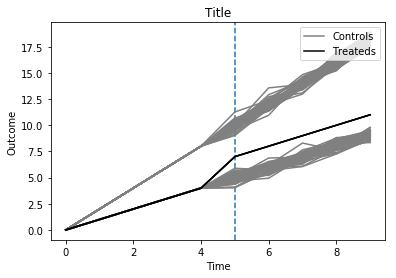

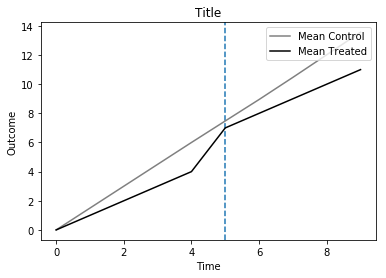

In [7]:
plt.show()

Analyze

In [8]:
#Currently the built-in joint opimization of penalties isn't great, so do two steps
ret = SC.estimate_effects(Y[:,:T0], Y[:,T0:], treated_units, max_n_pl=200) 
#V_penalty = ret.fit.V_penalty
#simple_summ(ret_full.fit, Y)
#ret = SC.estimate_effects(Y[:,:T0], Y[:,T0:], treated_units, covariate_penalties=[V_penalty], weight_penalty=0.00001, ret_CI=True)
simple_summ(ret.fit, Y)

V_pen=15284132.4692, W_pen=1.5
V=[  0.00000000e+00   0.00000000e+00   0.00000000e+00   4.52853796e-06
   2.95419327e-05]
Treated weights: sim=0.00984234790554, uns=0.00968469581109, sum=0.976352185831
Sim Con weights: sim=0.00984234790554, uns=0.00968469581109, sum=0.976352185831
Uns Con weights: sim=0.0, uns=0.00978242056869, sum=0.976265079842
Treated diff: [ 0.         -0.46058698 -0.92117395 -1.38176093 -1.84234791 -0.28096539
 -0.71371613 -1.19419327 -1.70417532 -2.20913529]


Visualize

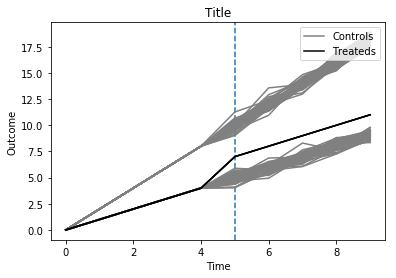

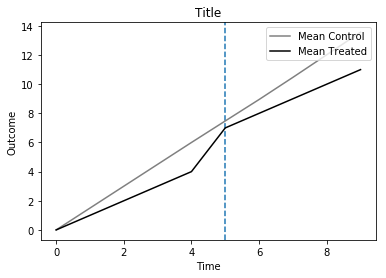

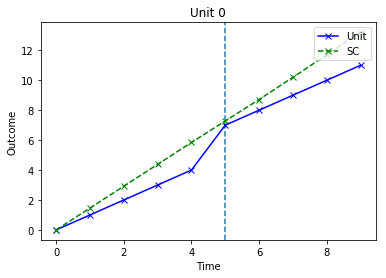

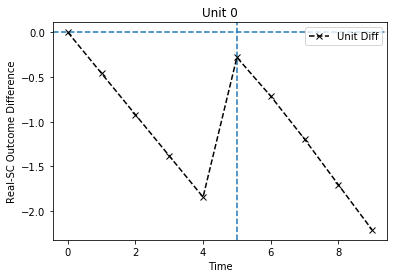

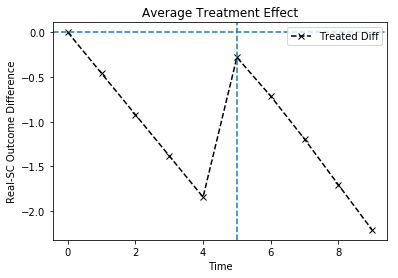

In [9]:
Y_sc = ret.fit.predict(Y)
[sc_raw, sc_diff] = ind_sc_plots(Y[0,:], Y_sc[0,:], T0, ind_ci=ret.ind_CI)
plt.figure("sc_raw")
plt.title("Unit 0")
#sc_raw.show()
plt.figure("sc_diff")
plt.title("Unit 0")
#sc_diff.show()
[te] = te_plot(ret)
plt.figure("te")
plt.title("Average Treatment Effect")
plt.show()

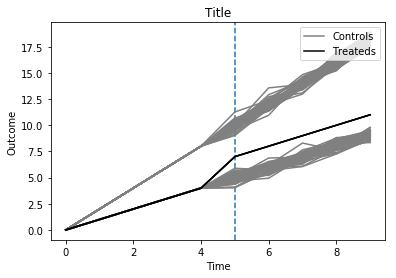

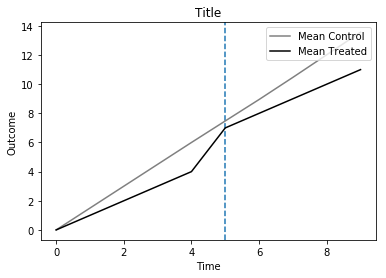

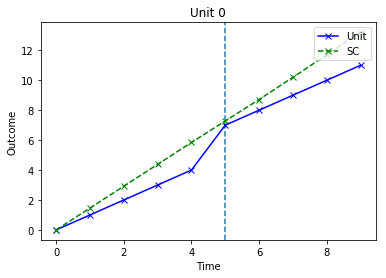

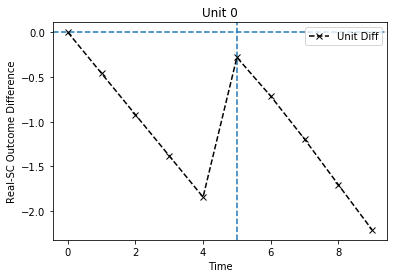

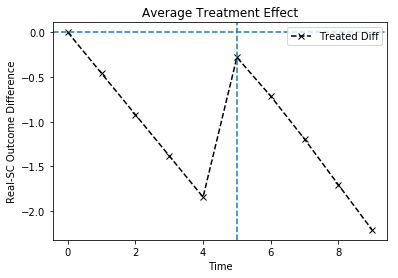

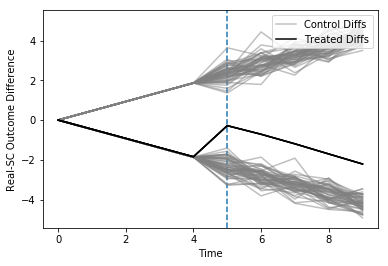

In [10]:
diffs = Y - Y_sc
diffs_plt = diffs_plot(diffs, treated_units, control_units)
plt.show()

## Different cycles 

In [11]:
proto_sim = np.array([0,1,4,3,4,5,6,9,8,9],ndmin=2)
proto_not = np.array([0,3,2,4,3,5,4,6,5,7],ndmin=2)
proto_tr  = proto_sim + proto_te
Y1 = np.matmul(np.ones((N1,1)), proto_tr)
Y0_sim = np.matmul(np.ones((N0_sim,1)), proto_sim) + \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y0_not = np.matmul(np.ones((N0_not,1)), proto_not) + \
    np.hstack((np.zeros((N0_sim,T0)),np.random.normal(0,.4,(N0_sim,T1))))
Y = np.vstack((Y1,Y0_sim,Y0_not))

Motivation: Treated unit does not look like a simple average of controls

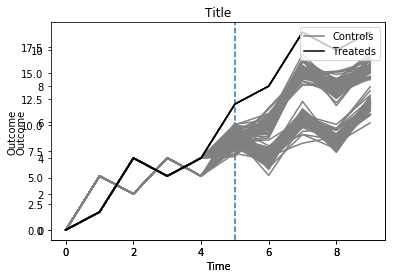

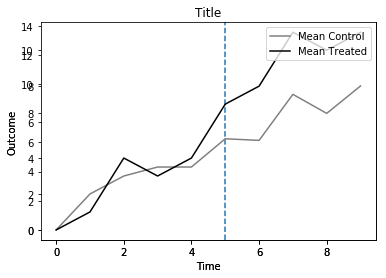

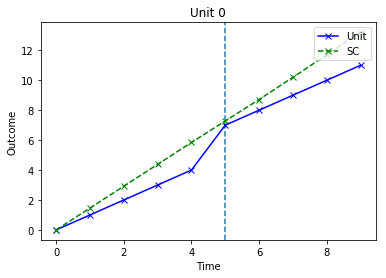

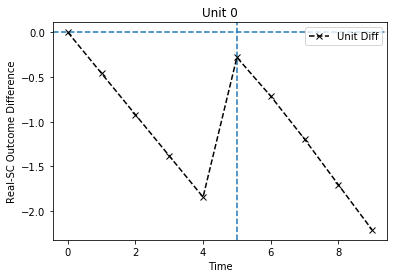

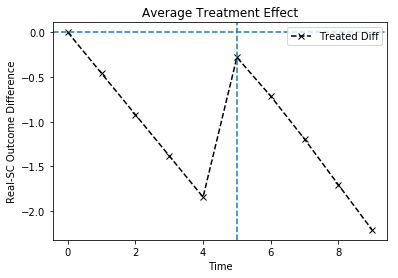

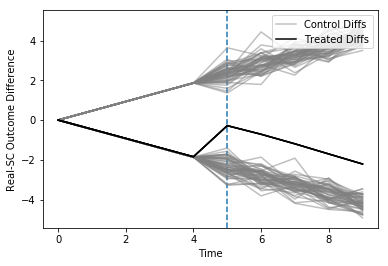

In [12]:
[raw_all, raw_means] = raw_plots(Y, treated_units, control_units, T0)
plt.show()

Analyze

In [13]:
#Currently the built-in joint opimization of penalties isn't great, so do two steps
ret = SC.estimate_effects(Y[:,:T0], Y[:,T0:], treated_units, max_n_pl=200)
#V_penalty = ret_full.fit.V_penalty
#simple_summ(ret_full.fit, Y)
#ret = SC.estimate_effects(Y[:,:T0], Y[:,T0:], treated_units, covariate_penalties=[V_penalty], weight_penalty=0.00001, ret_CI=True)
simple_summ(ret.fit, Y)

V_pen=1867655.70384, W_pen=0.5
V=[  0.00000000e+00   0.00000000e+00   5.63048850e-05   0.00000000e+00
   8.82263309e-06]
Treated weights: sim=0.010428751893, uns=0.0102211002853, sum=1.03249260892
Sim Con weights: sim=0.010428751893, uns=0.0102211002853, sum=1.03249260892
Uns Con weights: sim=0.0, uns=0.0103247691433, sum=1.03244808166
Treated diff: [ 0.         -1.05460264  0.89213959 -0.60853284  0.38108458  1.76272753
  2.84633581  3.19704872  3.28842432  2.71845728]


Visualize

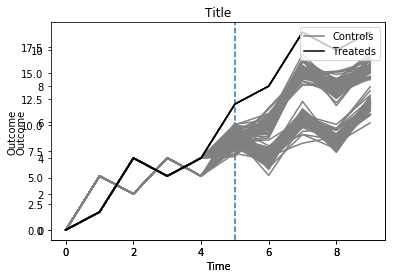

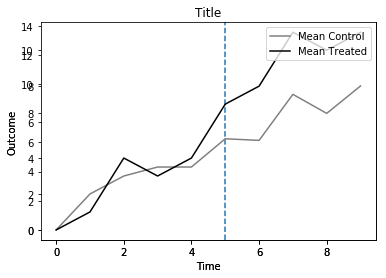

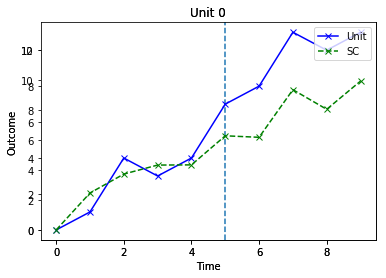

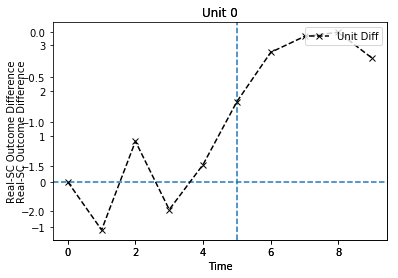

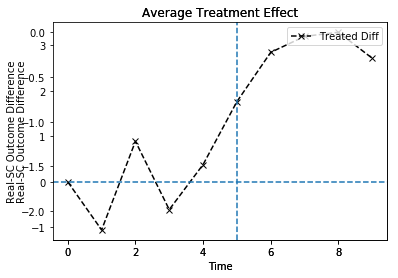

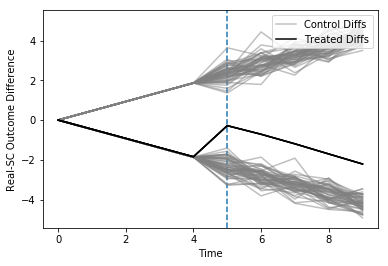

In [14]:
Y_sc = ret.fit.predict(Y)
[sc_raw, sc_diff] = ind_sc_plots(Y[0,:], Y_sc[0,:], T0, ind_ci=ret.ind_CI)
plt.figure("sc_raw")
plt.title("Unit 0")
#sc_raw.show()
plt.figure("sc_diff")
plt.title("Unit 0")
#sc_diff.show()
[te] = te_plot(ret)
plt.figure("te")
plt.title("Average Treatment Effect")
plt.show()

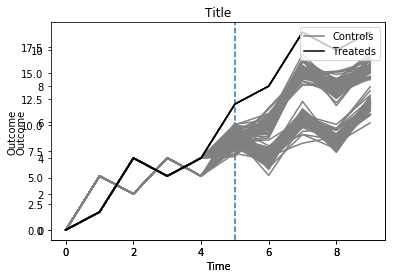

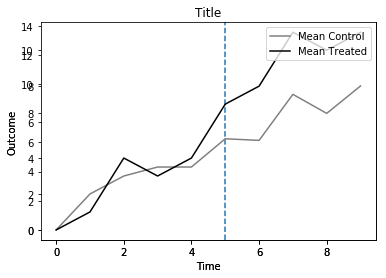

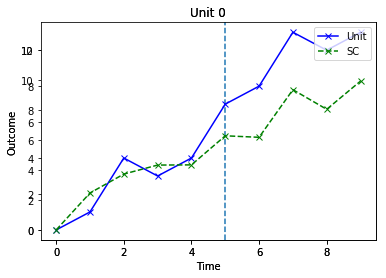

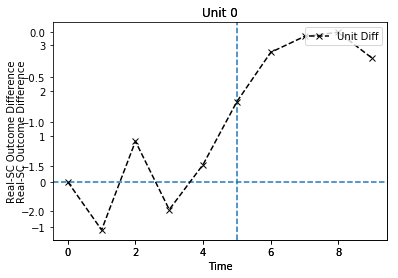

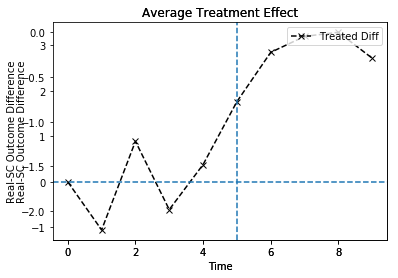

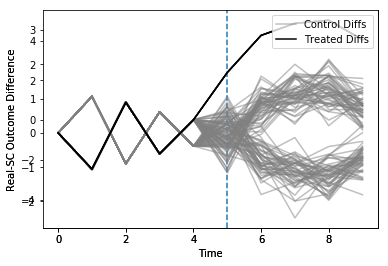

In [15]:
diffs = Y - Y_sc
diffs_plt = diffs_plot(diffs, treated_units, control_units)
plt.show()